<a href="https://colab.research.google.com/github/charris561/Discrete-Structures/blob/main/Projects/Project%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 2150 Computer Project 5: Graph Representation and Algorithms

**Goals:** Gain experience in representing graphs in code, using Python's `dict` data structure, and writing a simple graph algorithm.

**Instructions:** Carefully read all of the text in the Markdown cells; these give you information about the assignment. **Numbered, heading-level text at the bottom of the document describes the project deliverables.** Cells requesting the implementation of a function also include `expectEqual` statements. Use these statements as a guide to the expected output of your function; if the assertions fail, then the function is invalid.

**Note: Include each deliverable directly underneath the markdown cell which asks for it.** 

**Note also: when we receive your notebook, the first thing we will do is clear its memory and run it from the beginning.** You are responsible for ensuring that when we do this, the entire notebook executes and computes the desired results. Notebooks which fail to execute will typically receive low grades.

**Note this too: hard-coded answers, even if correct, will be awarded few if any points.** Your answers should be generated programmatically, not derived offline and then hard-coded.

**To test your code, we are providing the following functions which will verify basic formatting for your adjacency lists.** If tests in the notebook fail, something is wrong. However, the converse may not be true -- passing tests does not guarantee that your code is implementing the exactly correct functionality.

In [1]:
def expectEqual(a, b):
    if a != b :
        print('FAIL expected:', b, ' got:', a)
        
def checkUndirected(adjList) :
    for node in adjList :
        for neighbor in adjList[node] :
            try :
                if not node in adjList[neighbor] :
                    print('FAIL: graph is not undirected: '+str(adjList))
                    return
            except KeyError :
                print('FAIL: missing node in adjacency list for graph '+str(adjList))
                return

def checkSelfLoops(adjList) :
    for node in adjList :
        if node in adjList[node] :
            print('FAIL: graph has a self-loop: '+str(adjList))
            return 

# The Python `dict` object

In this project, we will implement a particular type of adjacency list using Python's `dict` object (`dict` is short for "dictionary"). At a very high level, a `dict` is like a list that can be indexed by any object. (At a low level, a `dict` is a hash map.)

You can initialize an empty `dict` using curly braces:

In [2]:
my_dict = {}

A `dict` is a little bit like a list, in the sense that it contains some objects. Recall that in a list, each integer index is associated with a value. In a `dict`, the indices don't have to be integers -- they can be any object (strictly: any "hashable" object -- see documentation for more details). In a `dict`, we call the references "keys." To assign something to a key in a dict, use square brackets. Keys don't all have to be integers, or even the same datatype!

In [3]:
my_dict['A'] = 234
my_dict[5] = "some string"
print(my_dict)

{'A': 234, 5: 'some string'}


The values in a `dict` can be any Python object. In the next cell, we add a new key/value pair whose value is a set:

In [4]:
my_dict['a set']={1,2,3}
print(my_dict)
my_dict['a set'].add(4)
print(my_dict)

{'A': 234, 5: 'some string', 'a set': {1, 2, 3}}
{'A': 234, 5: 'some string', 'a set': {1, 2, 3, 4}}


The dictionary `my_dict` now has three keys. If you want to iterate over the keys in a `dict`, you can use a for loop like this:

In [5]:
for key in my_dict :
    print('the key: ' + str(key) + '\tis associated with the value: ' + str(my_dict[key]))

the key: A	is associated with the value: 234
the key: 5	is associated with the value: some string
the key: a set	is associated with the value: {1, 2, 3, 4}


That's enough to get you started, but to complete Deliverable #1, you might want to take a look at the [official documentation](https://docs.python.org/3.8/tutorial/datastructures.html#dictionaries) or do some [searching for tutorials.](https://www.google.com/search?client=firefox-b-1-d&q=python+dict+tutorial)

# Deliverable #1: Practice using Python `dict` objects

Create a function called `list_to_dict` which accepts a list of pairs $(a_1,b_1),(a_2,b_2),\dots,(a_n,b_n)$ and returns a dictionary with keys $a_1,a_2,\dots,a_n$. The dictionary values should be `set` objects; the value associated with key $a_i$ should be the set $\{b_k:a_k=a_i\}$. For example, the input list `[(1,2),(3,4),(5,6)]` should return the dictionary `{1: {2}, 3: {4}, 5: {6}}`. Input pairs could contain strings or numbers. Furthermore, you should not assume that the keys $a_i$ are distinct; your code should handle repeated keys by adding extra values to the associated set. For example, the input list `[(1,'a'),(1,3)]` should return the dictionary `{1: {'a', 3}}`. A concise description of the function's action is described in the function's docstring below, and several tests are provided.

In [6]:
def list_to_dict(input_list) :
    '''
    Input:  list of 0 or more pairs [(a_1,b_1),...,(a_n,b_n)]; each a_i, b_i can be an integer or a string
    Output: dict with keys a_1,a_2,...,a_n.
            The value associated with key a_i is the set {b_k such that a_k=a_i}
    '''
    return_dict = {}
    
    for pair in input_list:
        key = pair[0]
        value = pair[1]

        if (return_dict.get(key) != None):
            return_dict[key].add(value)
        else:
            return_dict[key]={value}
    
    return return_dict

expectEqual(list_to_dict([]),{})
expectEqual(list_to_dict([(1,2),(3,4)]),{1:{2},3:{4}})
expectEqual(list_to_dict([(1,2),(1,3)]),{1: {2, 3}})
expectEqual(list_to_dict([('a',7),(10,'b'),('strings can be keys too','they sure can')]),{'a': {7}, 10: {'b'}, 'strings can be keys too': {'they sure can'}})

# Graph Representation

As discussed in Lecture 23, the way we represent graphs in a computer matters. In this project, you'll write a function that converts from an edge-list representation into an adjacency-list representation. 

Recall that an edge-list representation simply writes down an unstructured list of all the edges in a graph. While compact, this type of representation doesn't work very well with algorithms. To fix this, one option is to use *adjacency-lists* -- which explicitly contain a list of each node's neighbors. In this project, we will use Python's `dict` object to implement adjacency lists.

In this project, we use the following representations:

### Formats
**Edge list:** a `list` of edges represented as vertex pairs. For graph $(V,E)$ with $V=\{v_1,\dots,v_n\}$, the edge list representation is of the form `[(vi,vj),...,(vk,vl)]|`, where an edge exists between vertices `vi` and `vj`, an edge exists between vertices `vk` and `vl`, and so on.

**Adjacency list:** a `dict` with vertex/neighbor-set key/value pairs. That is, each vertex is a key, and that key's value is a *set* of that vertex's neighbors in the graph. For graph $(V,E)$ with $V=\{v_1,\dots,v_n\}$, the adjacency list representation is of the form `{v1 : {v1's neighbors}, v2 : {v2's neighbors},...}`.

**To help visualize graphs, we are providing the `drawGraph` function for your unlimited use.** See the function's docstring for information about how to use it. For your convenience, we also provide two examples of how it can be used below to draw graphs.

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def drawGraph(adjList,actually_draw=True) :
    G = nx.Graph()
    for node in adjList :
        G.add_node(node)
        G.add_edges_from([(node,neighbor) for neighbor in adjList[node]])
    if actually_draw :
        nx.draw_spring(G, with_labels=True, font_weight='bold')

### Examples

In each code cell, we give an edge list, the corresponding adjacency list, and then use the provided `drawGraph` function to visualize the graph.
Note in each that the edge list is more compact than the adjacency list; this is partly because the adjacency list explicitly represents each edge twice.
For instance in Example 1, there is an edge between A and D; the adjacency list represents this by saying "one of A's neighbors is D," and also "one of D's neighbors is A."

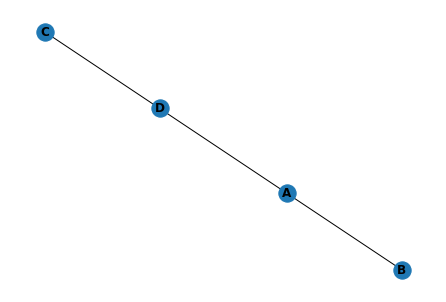

In [8]:
# Example 1
Gexample1_edgeList = [('A','B'),
                      ('C','D'),
                      ('A','D')]
Gexample1_adjList = {'A': {'B', 'D'}, 
                     'B': {'A'}, 
                     'C': {'D'}, 
                     'D': {'A', 'C'}}
drawGraph(Gexample1_adjList)

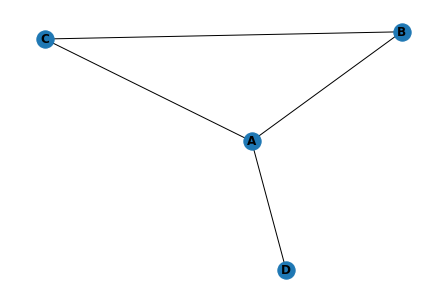

In [9]:
# Example 2
Gexample2_edgeList = [('A','B'),
                      ('C','B'),
                      ('A','D'),
                      ('A','C')]
Gexample2_adjList = {'A':{'B','C','D'},
                     'B':{'A','C'},
                     'C':{'A','B'},
                     'D':{'A'}}
drawGraph(Gexample2_adjList)

### Check Functions
In the next cell, we provide an example of how to use the check functions. If the checks pass, nothing is printed -- otherwise a simple message will print and we give three examples of this.

In [10]:
# Adjacency list is implemented as Python Dict, with node:neighborset key:val pairs.
G_selfloop = {'A':{'A'}} # this is a graph with a self-loop -- which we don't want
checkSelfLoops(G_selfloop)

G_Directed = {'A':{'B'}, # this is a graph with an edge from A to B, but no edge from B to A. Also don't want.
              'B':{}}
checkUndirected(G_Directed)

G_Directed2 = {'A':{'B'}} # this is an adjacency list that doesn't have an entry for node B. Not good.
checkUndirected(G_Directed2)

FAIL: graph has a self-loop: {'A': {'A'}}
FAIL: graph is not undirected: {'A': {'B'}, 'B': {}}
FAIL: missing node in adjacency list for graph {'A': {'B'}}


# Deliverable #2: Convert Edge-list representation to Adjacency-List representation

Now let's take our newfound knowledge of Python dictionaries and our definitions of graph representations and use it to represent graphs. Create a function called `edgeList_to_adjList` which accepts a list of edges (that is, vertex pairs) and returns an adjacency-list representation of the same graph according to the formatting described above. Several tests are provided to help you check your work. If your function works properly, the `MysteryGraph` will be visualized and show you a neat pattern.

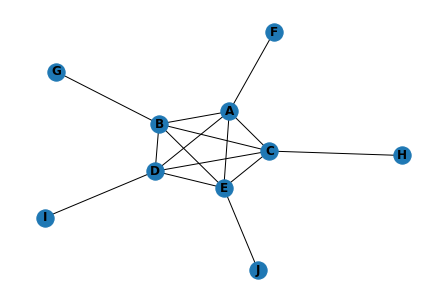

In [11]:
def edgeList_to_adjList(edgeList) :
    adjList = {}
    
    for edge in edgeList:
      
      #goal, assign each edge a node to mark it's adjaceny to that node
      key = edge[0]
      value = edge[1]
      if (adjList.get(key) != None):
        adjList[key].add(value)
      else:
        adjList[key]={value}

      #invert key and value to represent edge correctly
      key = edge[1]
      value = edge[0]
      if (adjList.get(key) != None):
        adjList[key].add(value)
      else:
        adjList[key]={value}

    return adjList


expectEqual(edgeList_to_adjList([]),{})
expectEqual(edgeList_to_adjList([('A','B')]),{'A': {'B'}, 'B': {'A'}})
expectEqual(edgeList_to_adjList([('A','B'),('C','D')]),{'A': {'B'}, 'B': {'A'}, 'C': {'D'}, 'D': {'C'}})
expectEqual(edgeList_to_adjList([('A','B'),('C','D'),('B','D')]),{'A': {'B'}, 'B': {'D', 'A'}, 'C': {'D'}, 'D': {'C', 'B'}})
expectEqual(edgeList_to_adjList([('A','B'),('A','C'),('A','D'),('C','D'),('B','C'),('B','D')]),{'A': {'D', 'C', 'B'}, 'B': {'D', 'A', 'C'}, 'C': {'D', 'A', 'B'}, 'D': {'A', 'C', 'B'}})


MysteryGraph = [('A','B'),('A','C'),('A','D'),('A','E'),('A','F'),('B','C'),('B','D'),('B','E'),('B','G'),('C','D'),('C','E'),('C','H'),('D','E'),('D','I'),('E','J')]
checkSelfLoops(edgeList_to_adjList(MysteryGraph))
checkUndirected(edgeList_to_adjList(MysteryGraph))
drawGraph(edgeList_to_adjList(MysteryGraph)) # a fancy graph should be visualized if you get this right

# Deliverable #3: Determine if a given graph is Eulerian
Recall the a graph is called *Eulerian* if it is possible to walk around the graph, visiting every edge exactly once, and returning to your starting vertex. This was discussed in Video 22, and [more information can be found here.](https://en.wikipedia.org/wiki/Eulerian_path)

One way to determine that a graph is Eulerian is to actually find an eulerian circuit, or determine that no such circuit exists. **Another much simpler way was discussed in Video 22.**

Complete the function definition below for function `eulerian`. The function's input should be a graph represented as **an edge list**. If the input graph is Eulerian, the function should output `True`, and if the input graph is not Eulerian, the function should output `False`. Note: you can assume that the input graph is connected (that is, that a path exists between every pair of vertices). Use whatever technique you want to determine Eulerianness!

In [12]:
def eulerian(edgeList) :
    '''
    Determine whether input graph is Eulerian.
    Input: Simple, undirected, connected graph represented by an edge list.
    Output: True if the input graph is Eulerian, False if the input graph is not Eulerian.
    '''
    #Conditions for eulerian to be true: 
    # degree is even on every vertex 
    #   >length of adjacency list must be even for each key. If one key is not even, eulerian evaluates to false

    adjList = edgeList_to_adjList(edgeList)
    isEulerian = True

    for key in adjList:
      if (len(adjList[key]) % 2 != 0):
        isEulerian = False

    return isEulerian


expectEqual(eulerian([('A','B')]),False)
expectEqual(eulerian([('A','B'),('B','C')]),False)
expectEqual(eulerian([('A','B'),('B','C'),('A','C')]),True)
expectEqual(eulerian([('A','B'),('B','C'),('A','D'),('C','D')]),True)
expectEqual(eulerian([('A','B'),('B','C'),('A','D'),('C','D'),('B','D'),('D','E'),('E','B')]),True)
expectEqual(eulerian([('A','B'),('A','C'),('A','D'),('A','E'),('B','C'),('B','D'),('B','E'),('C','D'),('C','E'),('D','E')]),True)
expectEqual(eulerian(MysteryGraph),False)